In [1]:
#import libraries  
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

sns.set()

# Instantiate
scaler = StandardScaler()
lr = LinearRegression()

#load the data
customer_df = pd.read_csv(r'C:\Users\DELL\Desktop\data\QVI_purchase_behaviour.csv')
transaction_df = pd.read_excel(r'C:\Users\DELL\Desktop\data\QVI_transaction_data.xlsx')

In [2]:
# View the first few rows of the customer data
print(f'This data contains {customer_df.shape[0]} rows and {customer_df.shape[1]} columns')
customer_df.head()

This data contains 72637 rows and 3 columns


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
# Convert column names to lower case
customer_df.columns = customer_df.columns.str.lower()

# Rename columns
customer_df.rename(columns={'lylty_card_nbr':'loyalty_card_no','lifestage':'lifestage',\
                            'premium_customer':'customer_segment'}, inplace=True)
# Check for duplicates
print(f'There are {customer_df.duplicated().sum()} duplicates in this data')

# Check the loyalty_card_no column to know the total number of customers in the data
print(f"\nThere are {customer_df['loyalty_card_no'].nunique()} customers in the data")

# Edit the lifestage column so that all the values are converted to lower case
customer_df['lifestage'] = customer_df['lifestage'].str.lower()

# Check for the number of segments in the customer_segment column
display(customer_df['customer_segment'].unique())

#Check for nulls
customer_df.isna().sum()

There are 0 duplicates in this data

There are 72637 customers in the data


array(['Premium', 'Mainstream', 'Budget'], dtype=object)

loyalty_card_no     0
lifestage           0
customer_segment    0
dtype: int64

In [4]:
#Cleaning the transaction table
display(transaction_df.head(15))
print(f"\nThe Transaction data contains {transaction_df.shape[0]} rows and {transaction_df.shape[1]} columns")
print(f'\nNulls in the Transaction data are as follows \n{transaction_df.isna().sum()}')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2



The Transaction data contains 264836 rows and 8 columns

Nulls in the Transaction data are as follows 
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [5]:
# Convert column names to lower case
transaction_df.columns = transaction_df.columns.str.lower()

# Clean the date column
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

# Rename the columns
transaction_df.rename(columns={'date':'date','store_nbr':'store_no','lylty_card_nbr':'loyalty_card_no',\
                               'txn_id':'transaction_id','prod_nbr':'product_no','prod_name':'product_name',\
                                'prod_qty':'product_quantity','tot_sales':'total_sales'}, inplace = True)
    
# Extracting the brand name and packsize

transaction_df['brand'] = transaction_df['product_name'].str.extract(r'^(\w+)\s.*')
transaction_df['pack_size (g)'] = transaction_df['product_name'].str.extract(r'(\d+)[gG]')
#transaction_df['pack_size (g)'] = transaction_df['pack_size (g)'].str.strip('g')

#Correcting Spelling of brand names

brands ={'Infzns':'Infuzions','Doritos':'Dorito', 'WW':'Woolworths', 'Snbts':'Sunbites','Smiths':'Smith','GrnWves':'Grain Waves'}
for brand in brands:
    transaction_df['brand'] = transaction_df['brand'].str.replace(brand, brands[brand], case=False)

# Correcting spellings and standardizing the product name column

corrections = {'compny': 'Company','chps':'Chips', 'chp':'chip', 's/cream':'Sour Cream','jlpno':'Jalapeno','hny':'Honey',\
               'gcamole':'Guacamole','hrb':'Herb','spce':'Spice','orgnl':'Original','swt':'Sweet','siracha':'Sriracha',\
               'infzns':'Infuzions','grnWves':'Grain Waves','btroot':'Beetroot','snbts':'Sunbites','whlgrn':'Wholegrain',\
               'whlegrn':'Wholegrain','frch/onin':'French/Onion'}
for word in corrections:
    transaction_df['product_name'] = transaction_df['product_name'].str.replace(word,corrections[word],case = False).str.strip()
transaction_df['product_name'] = transaction_df['product_name'].str.replace('&', ' & ')
transaction_df['product_name'] = transaction_df['product_name'].str.replace(r'\s+', ' ',regex=True)
transaction_df['product_name'] = transaction_df['product_name'].str.replace(r'([a-z])([A-Z])', r'\1 \2',regex=True)
transaction_df['product_name'] = transaction_df['product_name'].str.replace(r'([a-z])([0-9])', r'\1 \2',regex=True)
transaction_df['product_name'] = transaction_df['product_name'].str.extract(r'(\w.*)\s\d+[gG]',expand=True).iloc[:,0]

transaction_df.info()
display(transaction_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264836 non-null  datetime64[ns]
 1   store_no          264836 non-null  int64         
 2   loyalty_card_no   264836 non-null  int64         
 3   transaction_id    264836 non-null  int64         
 4   product_no        264836 non-null  int64         
 5   product_name      264836 non-null  object        
 6   product_quantity  264836 non-null  int64         
 7   total_sales       264836 non-null  float64       
 8   brand             264836 non-null  object        
 9   pack_size (g)     264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 17.2+ MB


,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_quantity,total_sales,brand,pack_size (g)
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smith,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly Sour Cream & Onion,5,15.0,Smith,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chips Honey & Jalapeno Chili,3,13.8,Kettle,150
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,Old,300
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,Smith,330
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,Grain,210
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,Dorito,150
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream & Chives,2,7.2,Grain,210


In [6]:
# Treating Nmerical Columns
# see the summary statistics of the columns

display(transaction_df[['product_quantity','total_sales']].describe())

print(f"Unique Values in Product Quantity columns are: {transaction_df['product_quantity'].unique()}")

print(f"Unique Values in Total Sales columns are: {transaction_df['total_sales'].unique()}")

# Using Tukey's fences, identify outliers in the columns
def find_outliers(df,cols):
    for col in cols:
        # Calculate the quartiles
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        # Calculate the IQR
        iqr = q3 - q1
        # Calculate the Tukey's fences
        lower_fence = q1 - 3 * iqr
        upper_fence = q3 + 3 * iqr
        # Identify the outliers
        outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)]
        print(f'the outliers in {col} are {outliers[col].unique()}')
        print(f'the percentage is {len(outliers)/len(df)}\n')
# Use the defined function
find_outliers(transaction_df, ['product_quantity','total_sales'])


,product_quantity,total_sales
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


Unique Values in Product Quantity columns are: [  2   3   5   1   4 200]
Unique Values in Total Sales columns are: [  6.     6.3    2.9   15.    13.8    5.1    5.7    3.6    3.9    7.2
  23.     9.2    1.7    3.3    2.1    3.     3.8    5.4    2.7    3.7
  14.8    4.4    6.6    2.6    3.25   4.6    5.8   15.5    7.8    4.2
   7.4    7.6    8.4    6.5    4.3   28.5    7.5    3.4   19.    11.8
  17.6    9.    13.2    1.9   10.2   13.    15.2   11.4   14.5    5.6
  10.8   10.4    1.5   16.5    1.8    5.2    5.9   18.4    8.8   18.5
   6.2    4.8    8.6    2.8    2.3    3.1    2.4   15.6   19.5   27.
   9.9   16.2   13.5   21.6   23.6   29.5   12.6    8.1   15.3   11.1
  22.     9.5   16.25  20.4   11.7   22.8    9.6    8.5   10.5   21.
  12.    14.4    9.75  16.8   25.5   17.7   17.2   17.1    4.5    6.8
  18.    12.9   11.5    8.7   14.    11.6   12.4  650.    21.5    9.3
  11.2    6.9 ]
the outliers in product_quantity are [  3   5   1   4 200]
the percentage is 0.10873521726653476

the

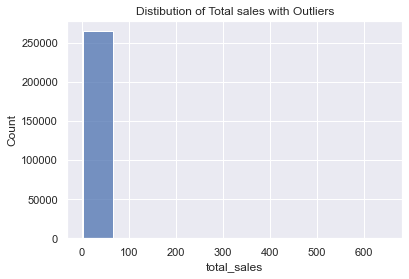

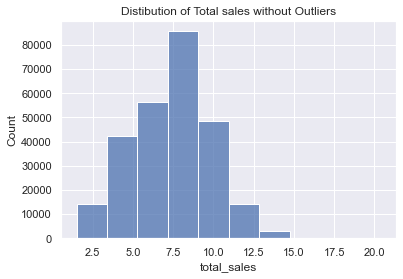

The total number of observations after filtering out outliers is 264622


In [7]:
# The outliers in the product quantity column are about 11 percent of the data, dropping them could cause us to loose
# meaningful data, however, Seeing that d % of outliers in d total sales column is minute we could filter them out instead

sns.histplot(x=transaction_df['total_sales'], bins = 10)
plt.title('Distibution of Total sales with Outliers')
plt.show()

transaction_df = transaction_df[transaction_df['total_sales']<21]

sns.histplot(x=transaction_df['total_sales'], bins = 10)
plt.title('Distibution of Total sales without Outliers')
plt.show()

print(f'The total number of observations after filtering out outliers is {len(transaction_df)}')

In [8]:
# Merge the dataframes together
new_df = transaction_df.merge(customer_df,on='loyalty_card_no')
# Check the merged data
new_df.isna().sum()

# Save the data
new_df.to_csv(r'C:\Users\DELL\Desktop\DASL 5 folder\dasl_final.csv')

In [9]:
new_df.head()

,date,store_no,loyalty_card_no,transaction_id,product_no,product_name,product_quantity,total_sales,brand,pack_size (g),lifestage,customer_segment
0,2018-10-17,1,1000,1,5,Natural Chip Company Sea Salt,2,6.0,Natural,175,young singles/couples,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,CCs,175,midage singles/couples,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,Woolworths,160,midage singles/couples,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,CCs,175,midage singles/couples,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,Smith,170,midage singles/couples,Budget


# Univariate Analysis

# Date

In [10]:
# Check the Date Range
print('earliest transaction:',new_df['date'].min(), '\n','latest transaction:',new_df['date'].max())

earliest transaction: 2018-07-01 00:00:00 
 latest transaction: 2019-06-30 00:00:00


 # Store Number

There are 272 Stores in the data, and the top 10 by  is shown as:


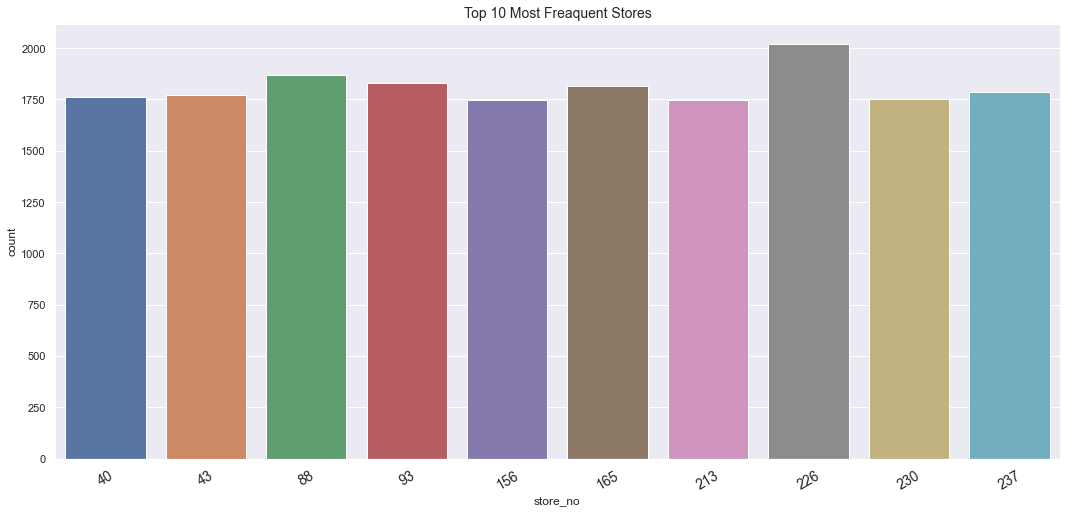

In [11]:
print('There are {} Stores in the data, and the top 10 by  is shown as:'.format(new_df['store_no'].nunique()))
plt.figure(figsize=(18,8))
top10 = new_df['store_no'].value_counts().nlargest(10)
top10df = new_df[new_df['store_no'].isin(top10.index)]
sns.countplot(x =top10df['store_no'])
plt.xticks(fontsize=14,rotation=30)
plt.title('Top 10 Most Freaquent Stores',fontsize=14)
plt.show()

# Loyalty Card Number

There are 72618 customers in the data


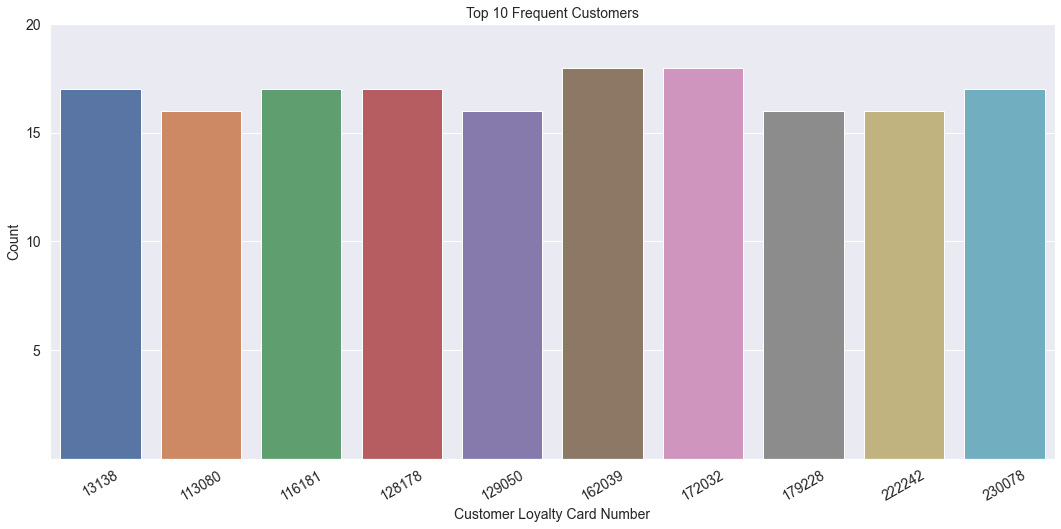

In [12]:
print('There are {} customers in the data'.format(new_df['loyalty_card_no'].nunique()))
plt.figure(figsize=(18,8))
top10 = new_df['loyalty_card_no'].value_counts().nlargest(10)
top10df = new_df[new_df['loyalty_card_no'].isin(top10.index)]
sns.countplot(x =top10df['loyalty_card_no'])
plt.xlabel('Customer Loyalty Card Number',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14,rotation=30)
plt.yticks([5,10,15,20],fontsize=14)
plt.title('Top 10 Frequent Customers',fontsize=14)
plt.show()

# Transaction id

In [13]:
print('There are {} transactions in the data'.format(new_df['transaction_id'].nunique()))

There are 262914 transactions in the data


# Product Number and Product Name

There are 114 product number and 114 product names in the data


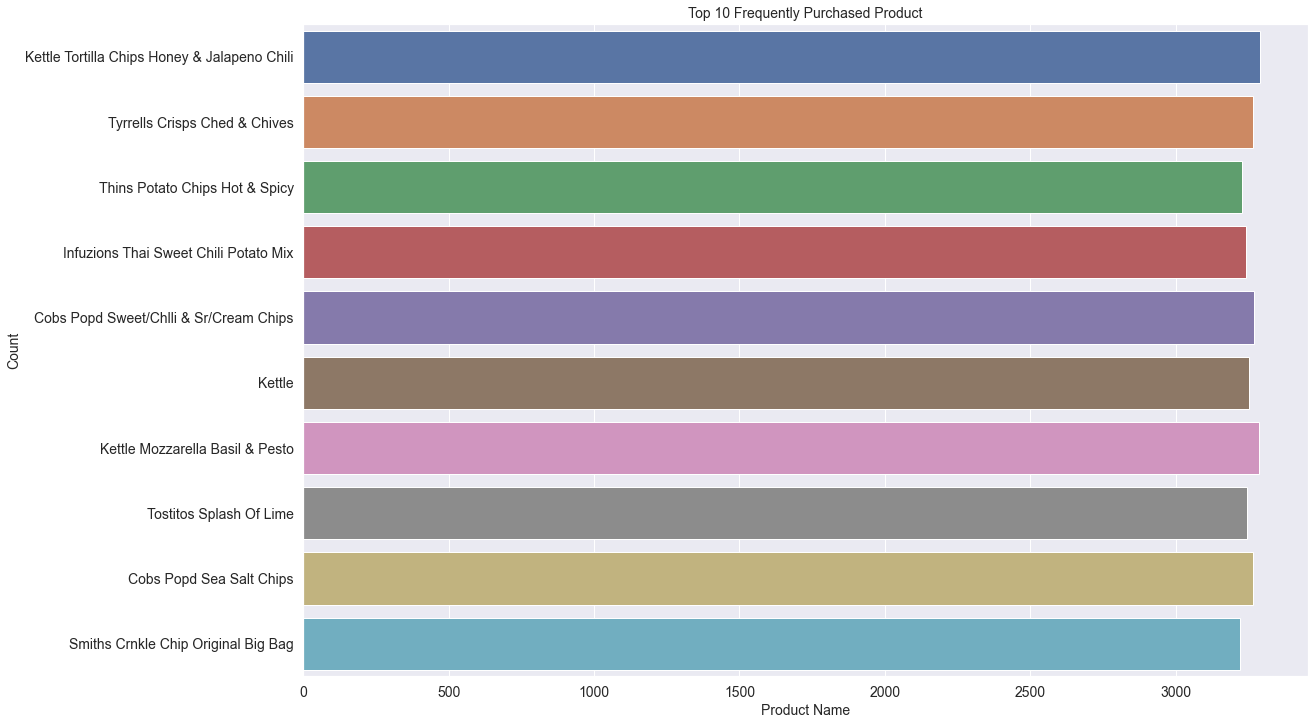

In [14]:
print('There are {} product number and {} product names in the data'.format(new_df['product_no'].nunique(),new_df['product_no'].nunique()))
plt.figure(figsize=(18,12))
top10 = new_df['product_name'].value_counts().nlargest(10)
top10df = new_df[new_df['product_name'].isin(top10.index)]
sns.countplot(y =top10df['product_name'])
plt.xlabel('Product Name',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 10 Frequently Purchased Product',fontsize=14)
plt.show()

# Product Quantity

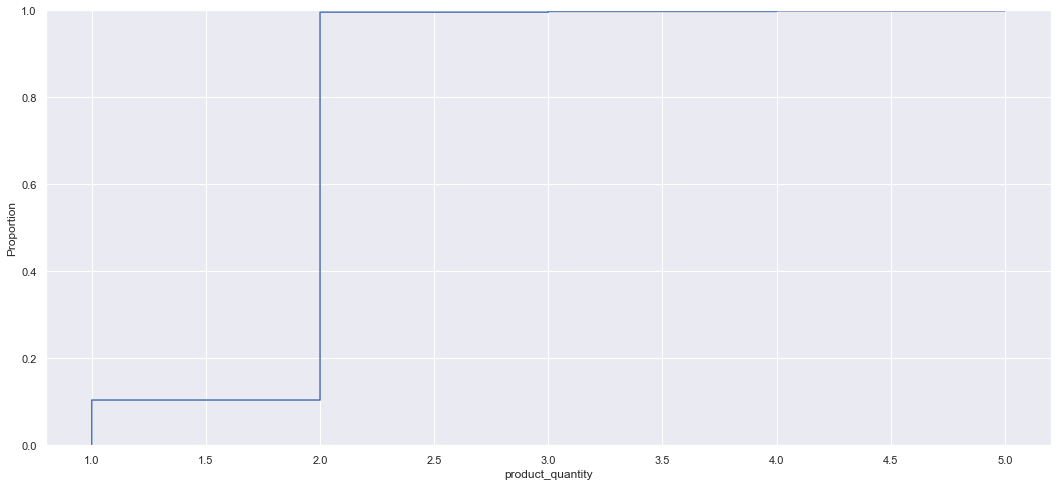

In [15]:
plt.figure(figsize=(18,8))
sns.ecdfplot(new_df['product_quantity'])
plt.show()

# Total Sales

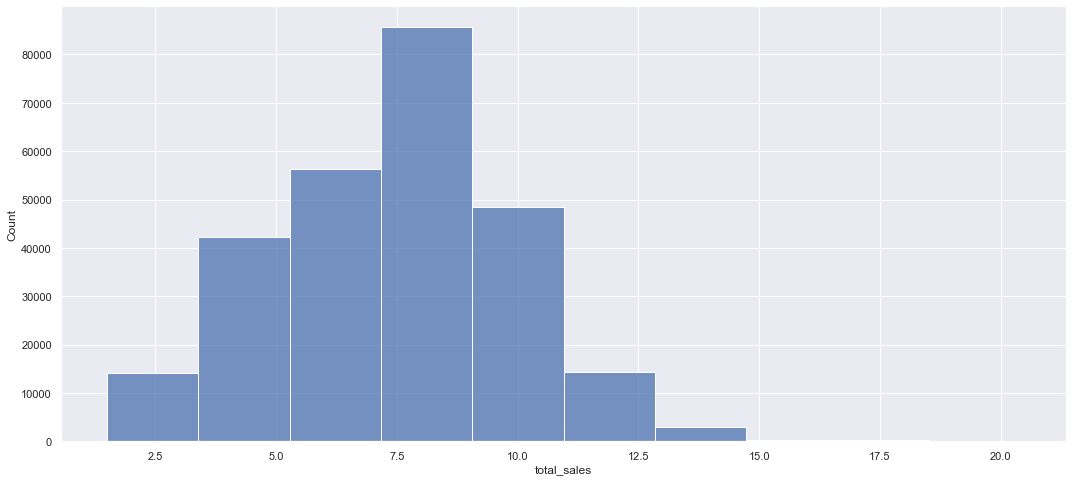

In [16]:
plt.figure(figsize=(18,8))
sns.histplot(new_df['total_sales'], bins=10)
plt.show()

# Brands

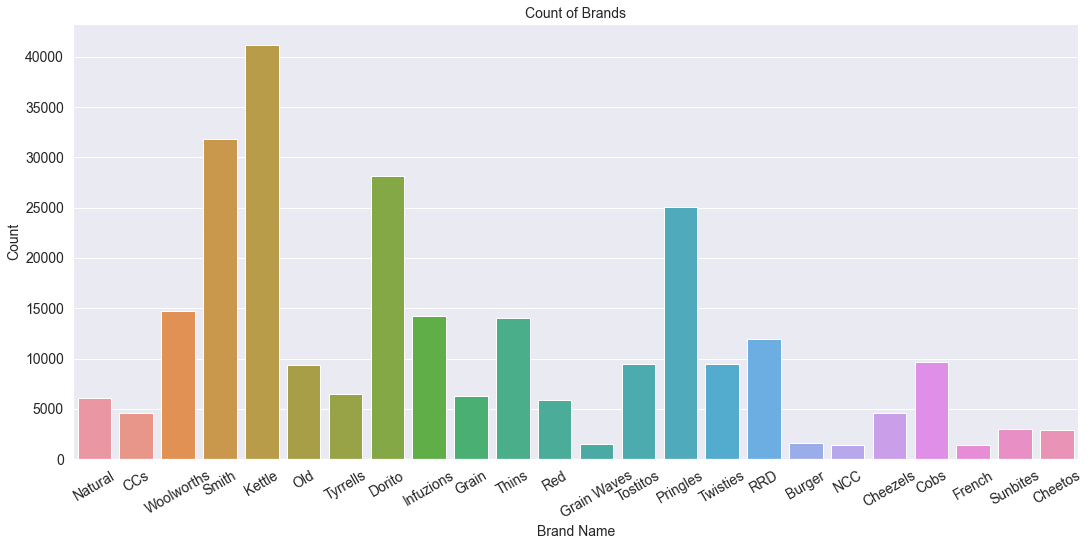

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(data=new_df,x='brand')
plt.title('Count of Brands',fontsize=14)
plt.xlabel('Brand Name',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.show()

# Product Pack Size

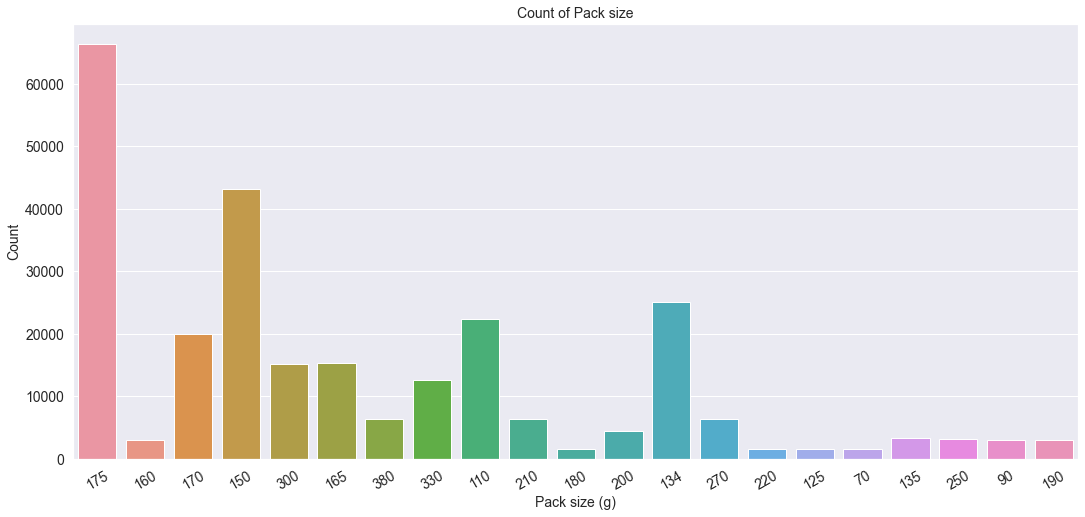

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(data=new_df,x='pack_size (g)')
plt.title('Count of Pack size',fontsize=14)
plt.xlabel('Pack size (g)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Customer's Lifestage

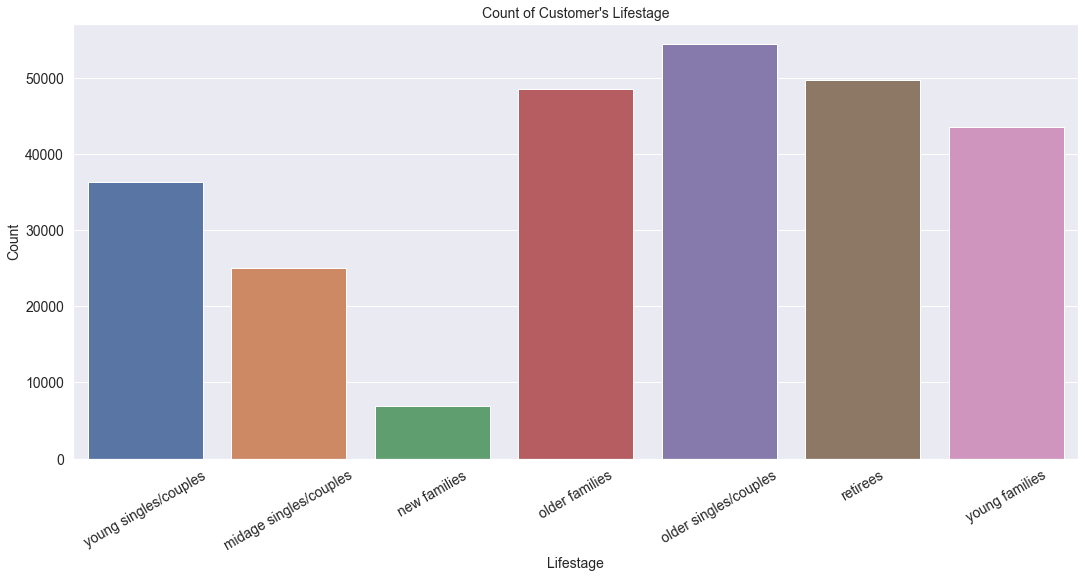

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(data=new_df,x='lifestage')
plt.title("Count of Customer's Lifestage", fontsize=14)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.show()

 # Customer Segment

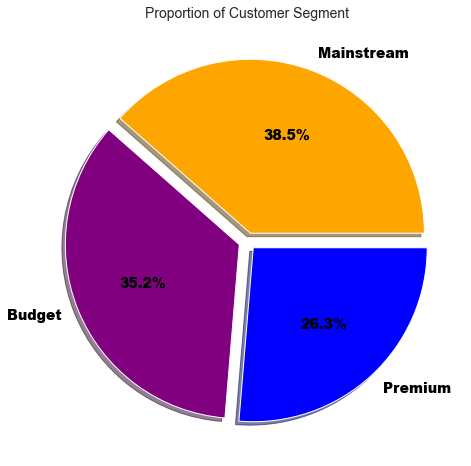

In [20]:
plt.figure(figsize=(18,8))
pie = new_df['customer_segment'].value_counts()
plt.pie(x=pie,labels=pie.index, explode=[0.05,0.05,0.05], autopct = '%0.1f%%',shadow = True, \
        colors=['orange', 'purple', 'blue'], textprops={'color':'black','weight':'heavy','size':14})
plt.title("Proportion of Customer Segment", fontsize=14)
plt.show()

# MultiVariate Analysis

# Relationship between product Quantity and Total Sales

The correlation coefficient between product quantity and total sales is 0.51


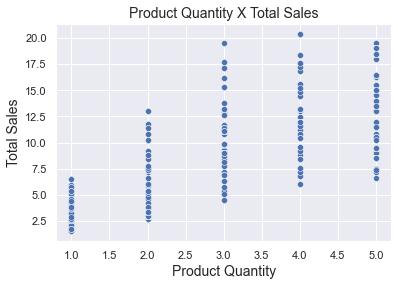

In [21]:
corr = np.corrcoef(new_df['product_quantity'], new_df['total_sales'])[0,1]
print('The correlation coefficient between product quantity and total sales is {}'.format(round(corr,2)))
sns.scatterplot(data=new_df,x='product_quantity',y='total_sales')
plt.title("Product Quantity X Total Sales", fontsize=14)
plt.xlabel("Product Quantity",fontsize=14)
plt.ylabel("Total Sales",fontsize=14)
plt.show()

# Sales X Brands X Customer Segment

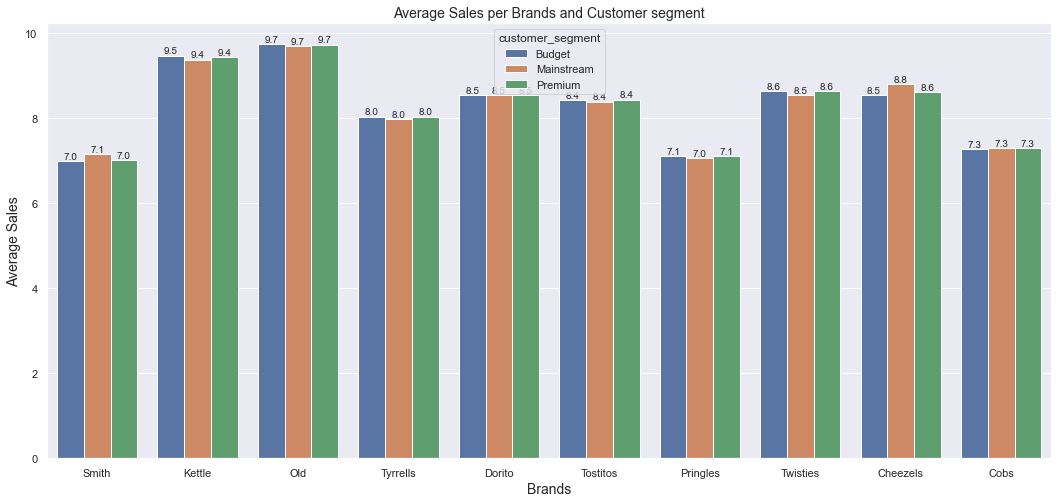

In [30]:
plt.figure(figsize=(18,8))
top10 = new_df.groupby(['brand'])['total_sales'].mean().nlargest(10)
top10df = new_df[new_df['brand'].isin(top10.index)]
ax=sns.barplot(data=top10df, x='brand', y='total_sales', hue='customer_segment',ci=False)
plt.xlabel('Brands', fontsize = 14)
plt.ylabel('Average Sales',fontsize=14)
plt.title('Average Sales per Brands and Customer segment',fontsize=14)
for bar in ax.containers:
        ax.bar_label(bar, label_type='edge', fontsize=10,fmt='%.1f')
plt.show()

# 

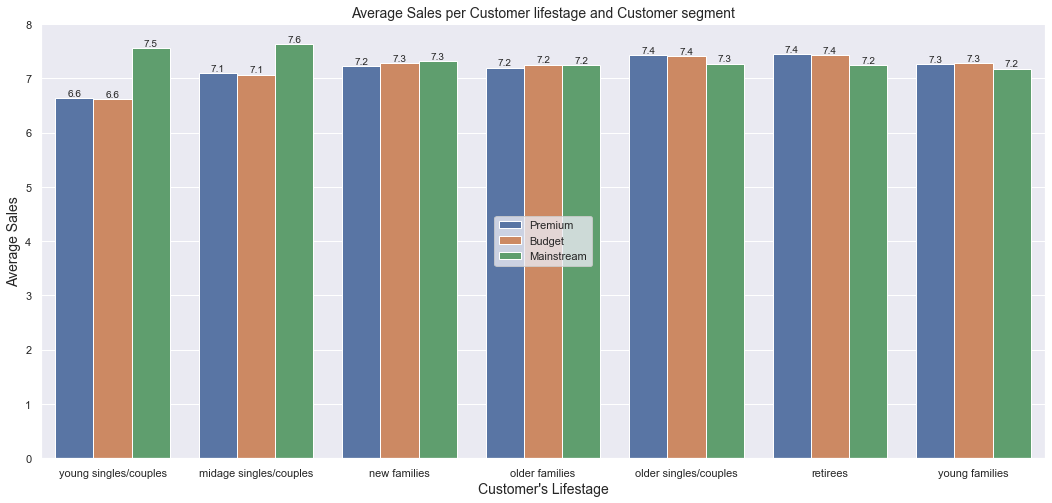

In [23]:
plt.figure(figsize=(18,8))
ax=sns.barplot(data=new_df, x='lifestage', y='total_sales', hue='customer_segment',ci=False)
plt.xlabel("Customer's Lifestage", fontsize = 14)
plt.ylabel('Average Sales',fontsize=14)
plt.title('Average Sales per Customer lifestage and Customer segment',fontsize=14)
for bar in ax.containers:
        ax.bar_label(bar, label_type='edge', fontsize=10,fmt='%.1f')
plt.legend(loc='center')
plt.show()

# 

# TASK 2

In [24]:
# Manhattan similarity is selected as similarity measure as the metrics being compared are numeric and comparable
# Define the function to calculate compare store
def compare_store(store1, store2):
    # Extract the monthly data for each store
    store1_data = new_df[new_df["store_no"] == store1].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique"})
    store2_data = new_df[new_df["store_no"] == store2].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique"})
    
    # Calculate the average number of transactions per customer for each store
    
    store1_data["Avg_transaction_per_cust"] = store1_data["transaction_id"] / store1_data["loyalty_card_no"]
    store2_data["Avg_transaction_per_cust"] = store2_data["transaction_id"] / store2_data["loyalty_card_no"]
    
    # Calculate the Pearson correlation coefficient for each metric
    
    if len(store1_data) == len(store2_data):
        
        sales_distance = np.sum(np.abs(np.array(store1_data["total_sales"]) - np.array(store2_data["total_sales"])))
        sales_similarity = 1 / (1 + sales_distance)
        cust_distance = np.sum(np.abs(np.array(store1_data["loyalty_card_no"]) - np.array(store2_data["loyalty_card_no"])))
        cust_similarity = 1 / (1 + cust_distance)
        tran_distance = np.sum(np.abs(np.array(store1_data["Avg_transaction_per_cust"]) - np.array(store2_data["Avg_transaction_per_cust"])))
        tran_similarity = 1 / (1 + tran_distance)
        similarity_score = (sales_similarity + cust_similarity + tran_similarity)/3
        return similarity_score
    else:
        pass
       
# Find the right control store for each Trial store
# List the trial stores
trial_stores = [77, 86, 88]
# List all stores
all_stores = new_df["store_no"].unique()
# Create an empty dictionary to store the control stores for each trial store
control_stores = {}
# Loop through each trial store
for trial_store in trial_stores:
    # Initialize the best score and the best control store
    best_score = 0
    best_control_store = None
    # Loop through each potential control store
    for potential_control_store in all_stores:
        # Skip if the potential control store is the same as the trial store
        if potential_control_store != trial_store:
            #pass
            # Calculate the similarity score between the trial store and the potential control store
            score = compare_store(trial_store, potential_control_store)
            #print(score)
            # Update the best score and the best control store if the score is higher than the current best score
            if score is not None and score > best_score:
                best_score = score
                best_control_store = potential_control_store
                # Store the best control store for the trial store in the dictionary
                control_stores[trial_store] = best_control_store

# Print the control stores for each trial store
print(control_stores)

{77: 64, 86: 122, 88: 162}


# Test if sales are significantly different for the Stores

> The Null hypothesis is as follows: There is no significant difference between the average sales of the trial and control stores
> The null hypothesis is tested used the two sample t_test. A t-test is a statistical test that compares the means of two samples and a significance level of 0.05 was set. 

> Judgement: If p-value <= 0.05 reject the null hypothesis. else fail to reject the null hypothesis.

In [25]:
for i,x in control_stores.items():
    t1 = new_df[new_df['store_no']==i]['total_sales']
    c1 = new_df[new_df['store_no']==x]['total_sales']
    # Conduct the t-test
    t_statistic, p_value = stats.ttest_ind(t1, c1)
    print('For trial store {} and control store {},The results are ->\nt_statistic: {:.3f}\n p_value: {:.3f}'.\
          format(i,x,t_statistic, p_value))
    print('\n')


For trial store 77 and control store 64,The results are ->
t_statistic: -25.740
 p_value: 0.000


For trial store 86 and control store 122,The results are ->
t_statistic: 0.516
 p_value: 0.606


For trial store 88 and control store 162,The results are ->
t_statistic: 24.914
 p_value: 0.000




C:\Users\DELL\AppData\Local\Temp\ipykernel_14600\2142198170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['month'] = subset['date'].dt.month


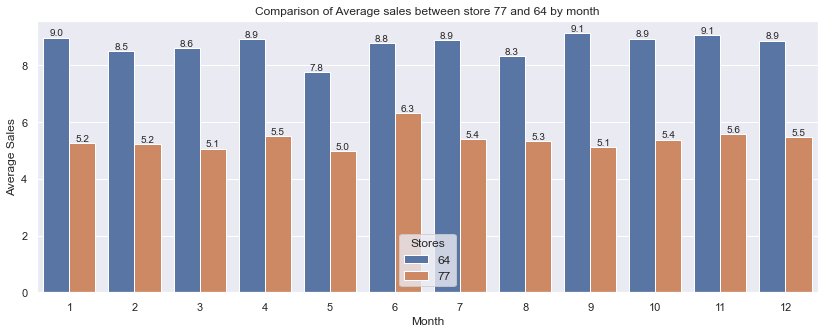

C:\Users\DELL\AppData\Local\Temp\ipykernel_14600\2142198170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['month'] = subset['date'].dt.month


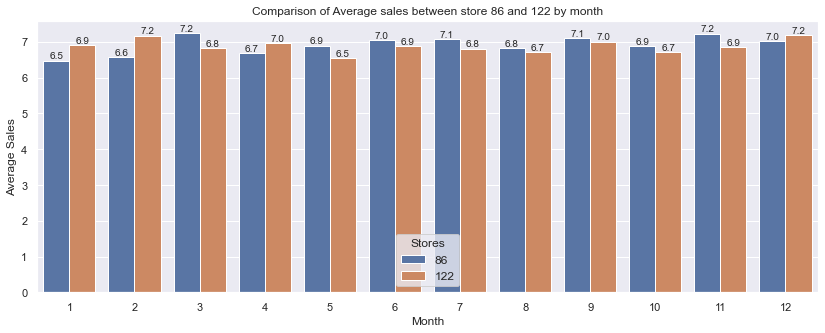

C:\Users\DELL\AppData\Local\Temp\ipykernel_14600\2142198170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['month'] = subset['date'].dt.month


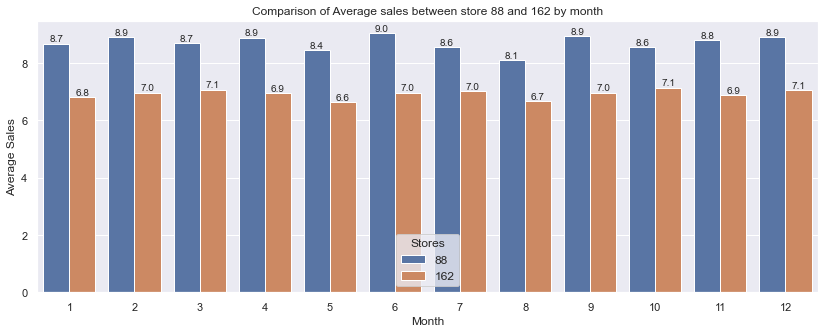

In [26]:
#Visually checking
for store1,store2 in control_stores.items():
    
    subset = new_df[(new_df['store_no']==store1)|(new_df['store_no']==store2)]
    subset['month'] = subset['date'].dt.month
    subset_grouped = subset.groupby(['month','store_no'], as_index=False)['total_sales'].mean()
    plt.figure(figsize=(14,5))
    ax=sns.barplot(data=subset_grouped,x='month', y= 'total_sales', hue='store_no')
    plt.title(f'Comparison of Average sales between store {store1} and {store2} by month',fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    for bar in ax.containers:
        ax.bar_label(bar, label_type='edge', fontsize=10,fmt='%.1f')
    plt.legend(loc='lower center',fontsize=12,title='Stores')
    plt.show()


# Interpretation

- As shown in the visuals above there is a clear difference between the average monthly sales for trial store 77 and control store 64. This is backed by the p-value of 0.000 which is less than the predetermined significance level of 0.05. As a result, the null hypothesis,which states that there is no significant difference between the average sales of the trial store 77 and control store 64 can be rejected. The t-statistic is -25.740 meaning that the difference between the average sales of the trial store and control store is -25.740 standard errors. In other words, there is strong evidence to suggest that the trial store and the control store perform significantly differently in terms of sales.

- The visual above reveals that the monthly average sales between trial store 86 and control store 122 is not much different, The p-value (0606) is greater than the specified significance level (0.05) backing the claim. Hence, in this instance, we are unable to reject the null hypothesis. The difference between the trial store's and control store's average sales is 0.516 standard errors, according to the t-statistics value of 0.381. That is, there isn't enough evidence to conclude that the two stores' sales performances are significantly different.

- At 0.000, The p-value is less than the specified significance level (0.05) for trial store 88 and control store 162. This is also seen in the visual above. Thus, in this instance, we reject the null hypothesis. According to the t-statistics of 0.219, the difference between the trial store's and control store's average sales is 24.914 standard errors. In Summary, there is enough proof to conclude that a significant difference exists between the sales performances of the trial and control stores.

In [27]:
# Investigate drivers of Sales in the stores where there is significant difference
# Finding which of the metric is driving sales

store77_data = new_df[new_df["store_no"] == 77].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique",'product_quantity':'sum'})
store77_data["Avg_transaction_per_cust"] = store77_data["transaction_id"] / store77_data["loyalty_card_no"]


store64_data = new_df[new_df["store_no"] == 64].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique",'product_quantity':sum})
store64_data["Avg_transaction_per_cust"] = store64_data["transaction_id"] / store64_data["loyalty_card_no"]

store88_data = new_df[new_df["store_no"] == 88].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique",'product_quantity':sum})
store88_data["Avg_transaction_per_cust"] = store88_data["transaction_id"] / store88_data["loyalty_card_no"]

store162_data = new_df[new_df["store_no"] == 162].groupby(new_df['date'].dt.month).\
    agg({"total_sales": "sum", "loyalty_card_no": "nunique", "transaction_id": "nunique",'product_quantity':sum})
store162_data["Avg_transaction_per_cust"] = store88_data["transaction_id"] / store88_data["loyalty_card_no"]

# Rename the columns
store77_data.columns = ['total_sales','total_no_customers','total_transaction','product_quantity','Avg_transaction_per_cust']
store64_data.columns = ['total_sales','total_no_customers','total_transaction','product_quantity','Avg_transaction_per_cust']
store88_data.columns = ['total_sales','total_no_customers','total_transaction','product_quantity','Avg_transaction_per_cust']
store162_data.columns = ['total_sales','total_no_customers','total_transaction','product_quantity','Avg_transaction_per_cust']

# Find the metric driving sales for each store
def sales_driver(df,y,z):
    x = df.drop(y,axis='columns')
    y = df[y]
    x_scaled = scaler.fit_transform(x)
    lr.fit(x_scaled,y)
    r_sq = lr.score(x_scaled,y)
    slope = list(lr.coef_)
    driver = max(slope)
    driver_loc = slope.index(driver)
    variables = x.columns.to_list()
    driver_var = variables[driver_loc]
    sns.barplot(x=variables, y = slope)
    plt.title(f'Sales Driver for store {z}')
    plt.xticks(rotation=45)
    plt.show()
    return f'The Top driver of sale for the store {z} is:\n{driver_var} ({round(driver,2)})'#\n{driver2_var}:{round(driver2,2)}'

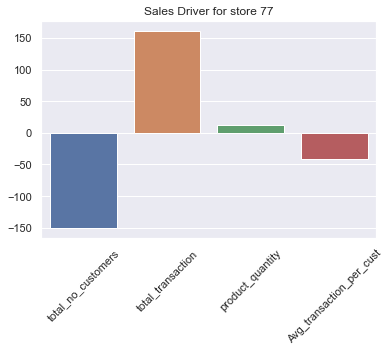

The Top driver of sale for the store 77 is:
total_transaction (161.45)




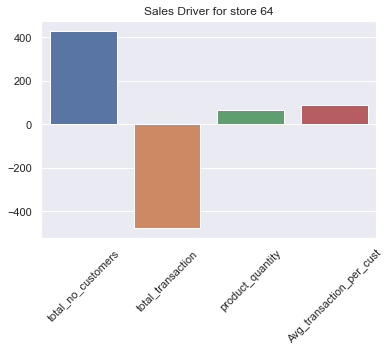

The Top driver of sale for the store 64 is:
total_no_customers (430.4)




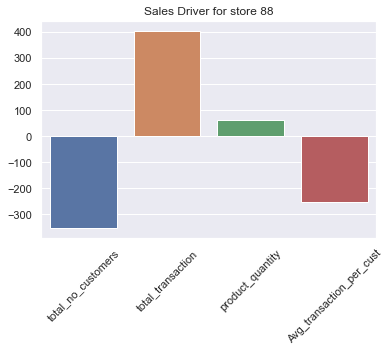

The Top driver of sale for the store 88 is:
total_transaction (405.08)




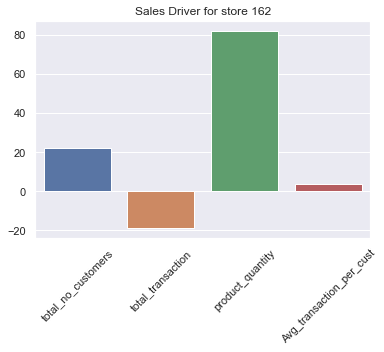

The Top driver of sale for the store 162 is:
product_quantity (82.09)


In [28]:
print(sales_driver(store77_data,'total_sales',77))
print('\n')
print(sales_driver(store64_data,'total_sales',64))
print('\n')
print(sales_driver(store88_data,'total_sales',88))
print('\n')
print(sales_driver(store162_data,'total_sales',162))

# Interpretation 

> It appears that all three variables— Avg_transaction_per_cust, total_transaction, and total_no_customers—are major influencers of changes in overall sales, according to the findings of the linear regression model. However, Total Transaction per customer was identified to have the most favorable impact on overall sales in store 77 and 86. Total number of customers was seen to be major driving foce for sales in store 64, while Product quantity was the major driver of sales in store 162. It's crucial to keep in mind that these findings only demonstrate correlation and do not imply causation.